In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Initial data exploration
# bundling all the data into a single dataset
def load_data(directory):
  data_frames = []
  for filename in os.listdir(directory):
    if filename.endswith('.csv'):
      file_path = os.path.join(directory, filename)
      df = pd.read_csv(file_path)
      data_frames.append(df)

  #combine all dataframes into one
  combined_df = pd.concat(data_frames, ignore_index=True)
  return combined_df

In [6]:
directory = './'
all_data = load_data(directory)

In [7]:
all_data.head()

,TIME;01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP;01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP;01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA;01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO;01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA;01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP;01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP;01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB;01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS;01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT;01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS;01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP;01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS;01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP;01_DL_FLCOR_CH0E_REV1_ > 090_SYS1_LIQ_LINE_TMP2;01_DL_FLCOR_CH0E_REV1_ > 101_SYS1_EVAP_APPR;01_DL_FLCOR_CH0E_REV1_ > 103_SYS1_LIQ_SUBCLG;01_DL_FLCOR_CH0E_REV1_ > 106_SYS1_COMP1_ENA;01_DL_FLCOR_CH0E_REV1_ > 113_SYS1_COMP1_SUCT_TEMP;01_DL_FLCOR_CH0E_REV1_ > 114_SYS1_COMP1_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 115_SYS1_COMP1_SUCT_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 116_SYS1_COMP1_DISCH_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 124_SYS1_COMP2_ENA;01_DL_FLCOR_CH0E_REV1_ > 142_SYS1_COMP3_ENA;01_DL_FLCOR_CH0E_REV1_ > 178_SYS2_SUC_PRESS;01_DL_FLCOR_CH0E_REV1_ > 179_SYS2_SUCT_TSAT;01_DL_FLCOR_CH0E_REV1_ > 180_SYS2_DISH_PRESS;01_DL_FLCOR_CH0E_REV1_ > 181_SYS2_SAT_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 184_SYS2_SYS_CAP;01_DL_FLCOR_CH0E_REV1_ > 185_SYS2_EEV_EVAP_STEPS;01_DL_FLCOR_CH0E_REV1_ > 187_SYS2_COND_FAN_OP;01_DL_FLCOR_CH0E_REV1_ > 190_SYS2_LIQ_LINE_TMP2;01_DL_FLCOR_CH0E_REV1_ > 201_SYS2_EVAP_APPR;01_DL_FLCOR_CH0E_REV1_ > 203_SYS2_LIQ_SUBCLG;01_DL_FLCOR_CH0E_REV1_ > 206_SYS2_COMP1_ENA;01_DL_FLCOR_CH0E_REV1_ > 213_SYS2_COMP1_SUCT_TEMP;01_DL_FLCOR_CH0E_REV1_ > 214_SYS2_COMP1_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 215_SYS2_COMP1_SUCT_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 216_SYS2_COMP1_DISCH_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 224_SYS2_COMP2_ENA;01_DL_FLCOR_CH0E_REV1_ > 242_SYS2_COMP3_ENA;02_CAREL_LINK_IO > 006_CHW_FLO_RATE;02_CAREL_LINK_IO > 110_SYS1_COMP1_AMPS;02_CAREL_LINK_IO > 128_SYS1_COMP2_AMPS;02_CAREL_LINK_IO > 146_SYS1_COMP3_AMPS;02_CAREL_LINK_IO > 210_SYS2_COMP1_AMPS;02_CAREL_LINK_IO > 228_SYS2_COMP2_AMPS;02_CAREL_LINK_IO > 246_SYS2_COMP3_AMPS
0,07/05/2024 00:00:00;9.3;8.5;1;1;1;8.0;16.6;13....
1,07/05/2024 00:00:10;9.3;8.5;1;1;1;8.0;16.6;13....
2,07/05/2024 00:00:20;9.3;8.5;1;1;1;8.0;16.6;13....
3,07/05/2024 00:00:30;9.3;8.5;1;1;1;8.0;16.6;13....
4,07/05/2024 00:00:40;9.3;8.5;1;1;1;8.0;16.6;13....


In [8]:
all_data.describe()

,TIME;01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP;01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP;01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA;01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO;01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA;01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP;01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP;01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB;01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS;01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT;01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS;01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP;01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS;01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP;01_DL_FLCOR_CH0E_REV1_ > 090_SYS1_LIQ_LINE_TMP2;01_DL_FLCOR_CH0E_REV1_ > 101_SYS1_EVAP_APPR;01_DL_FLCOR_CH0E_REV1_ > 103_SYS1_LIQ_SUBCLG;01_DL_FLCOR_CH0E_REV1_ > 106_SYS1_COMP1_ENA;01_DL_FLCOR_CH0E_REV1_ > 113_SYS1_COMP1_SUCT_TEMP;01_DL_FLCOR_CH0E_REV1_ > 114_SYS1_COMP1_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 115_SYS1_COMP1_SUCT_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 116_SYS1_COMP1_DISCH_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 124_SYS1_COMP2_ENA;01_DL_FLCOR_CH0E_REV1_ > 142_SYS1_COMP3_ENA;01_DL_FLCOR_CH0E_REV1_ > 178_SYS2_SUC_PRESS;01_DL_FLCOR_CH0E_REV1_ > 179_SYS2_SUCT_TSAT;01_DL_FLCOR_CH0E_REV1_ > 180_SYS2_DISH_PRESS;01_DL_FLCOR_CH0E_REV1_ > 181_SYS2_SAT_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 184_SYS2_SYS_CAP;01_DL_FLCOR_CH0E_REV1_ > 185_SYS2_EEV_EVAP_STEPS;01_DL_FLCOR_CH0E_REV1_ > 187_SYS2_COND_FAN_OP;01_DL_FLCOR_CH0E_REV1_ > 190_SYS2_LIQ_LINE_TMP2;01_DL_FLCOR_CH0E_REV1_ > 201_SYS2_EVAP_APPR;01_DL_FLCOR_CH0E_REV1_ > 203_SYS2_LIQ_SUBCLG;01_DL_FLCOR_CH0E_REV1_ > 206_SYS2_COMP1_ENA;01_DL_FLCOR_CH0E_REV1_ > 213_SYS2_COMP1_SUCT_TEMP;01_DL_FLCOR_CH0E_REV1_ > 214_SYS2_COMP1_DISCH_TEMP;01_DL_FLCOR_CH0E_REV1_ > 215_SYS2_COMP1_SUCT_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 216_SYS2_COMP1_DISCH_SHEAT;01_DL_FLCOR_CH0E_REV1_ > 224_SYS2_COMP2_ENA;01_DL_FLCOR_CH0E_REV1_ > 242_SYS2_COMP3_ENA;02_CAREL_LINK_IO > 006_CHW_FLO_RATE;02_CAREL_LINK_IO > 110_SYS1_COMP1_AMPS;02_CAREL_LINK_IO > 128_SYS1_COMP2_AMPS;02_CAREL_LINK_IO > 146_SYS1_COMP3_AMPS;02_CAREL_LINK_IO > 210_SYS2_COMP1_AMPS;02_CAREL_LINK_IO > 228_SYS2_COMP2_AMPS;02_CAREL_LINK_IO > 246_SYS2_COMP3_AMPS
count,620292
unique,620292
top,07/05/2024 00:00:00;9.3;8.5;1;1;1;8.0;16.6;13....
freq,1


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620292 entries, 0 to 620291
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [14]:
combined_data = './new_data.csv'
all_data.to_csv(combined_data, index=False)

In [17]:
new_data = pd.read_csv('./new_data.csv', delimiter=';')
new_data.head()

<ipython-input-17-310614d85519>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv('./new_data.csv', delimiter=';')


,TIME,01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP,01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP,01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA,01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO,01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA,01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP,01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP,01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB,01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS,...,01_DL_FLCOR_CH0E_REV1_ > 216_SYS2_COMP1_DISCH_SHEAT,01_DL_FLCOR_CH0E_REV1_ > 224_SYS2_COMP2_ENA,01_DL_FLCOR_CH0E_REV1_ > 242_SYS2_COMP3_ENA,02_CAREL_LINK_IO > 006_CHW_FLO_RATE,02_CAREL_LINK_IO > 110_SYS1_COMP1_AMPS,02_CAREL_LINK_IO > 128_SYS1_COMP2_AMPS,02_CAREL_LINK_IO > 146_SYS1_COMP3_AMPS,02_CAREL_LINK_IO > 210_SYS2_COMP1_AMPS,02_CAREL_LINK_IO > 228_SYS2_COMP2_AMPS,02_CAREL_LINK_IO > 246_SYS2_COMP3_AMPS
0,07/05/2024 00:00:00,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,22.7,0,0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
1,07/05/2024 00:00:10,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,22.7,0,0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
2,07/05/2024 00:00:20,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,22.7,0,0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
3,07/05/2024 00:00:30,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,25.7,0,0,23.3,0.1,0.1,0.1,42.4,0.1,0.1
4,07/05/2024 00:00:40,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,25.7,0,0,23.3,0.1,0.1,0.1,42.4,0.1,0.1


In [18]:
new_data.tail()

,TIME,01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP,01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP,01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA,01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO,01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA,01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP,01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP,01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB,01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS,...,01_DL_FLCOR_CH0E_REV1_ > 216_SYS2_COMP1_DISCH_SHEAT,01_DL_FLCOR_CH0E_REV1_ > 224_SYS2_COMP2_ENA,01_DL_FLCOR_CH0E_REV1_ > 242_SYS2_COMP3_ENA,02_CAREL_LINK_IO > 006_CHW_FLO_RATE,02_CAREL_LINK_IO > 110_SYS1_COMP1_AMPS,02_CAREL_LINK_IO > 128_SYS1_COMP2_AMPS,02_CAREL_LINK_IO > 146_SYS1_COMP3_AMPS,02_CAREL_LINK_IO > 210_SYS2_COMP1_AMPS,02_CAREL_LINK_IO > 228_SYS2_COMP2_AMPS,02_CAREL_LINK_IO > 246_SYS2_COMP3_AMPS
620287,16/04/2024 23:59:10,10.5,8.5,1.0,1.0,1.0,8.0,33.3,8.2,450.0,...,16.2,0.0,1.0,23.9,0.1,36.9,0.1,0.1,0.1,35.9
620288,16/04/2024 23:59:20,10.5,8.5,1.0,1.0,1.0,8.0,33.3,8.2,450.0,...,20.4,0.0,1.0,24.1,0.1,36.9,0.1,0.1,0.1,34.7
620289,16/04/2024 23:59:30,10.5,8.5,1.0,1.0,1.0,8.0,33.3,8.2,460.0,...,20.4,0.0,1.0,24.1,0.1,36.9,0.1,0.1,0.1,34.7
620290,16/04/2024 23:59:40,10.5,8.5,1.0,1.0,1.0,8.0,33.3,8.2,460.0,...,20.4,0.0,1.0,24.1,0.1,36.9,0.1,0.1,0.1,34.7
620291,16/04/2024 23:59:50,10.5,8.5,1.0,1.0,1.0,8.0,33.3,8.2,460.0,...,24.1,0.0,1.0,24.0,0.1,35.1,0.1,0.1,0.1,33.7


In [23]:
new_data['01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS'].tail()

620287    450.0
620288    450.0
620289    460.0
620290    460.0
620291    460.0
Name: 01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS, dtype: object

In [24]:
# Checking what are the data types in the individual columns
new_data.dtypes

TIME                                                   object
01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP                  object
01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP                 object
01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA              object
01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO                   object
01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA                  object
01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP                     object
01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP               object
01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB                object
01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS            object
01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT            object
01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS           object
01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP       object
01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP              object
01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS       object
01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP          object
01_DL_FL

In [26]:
# Check for missing values

new_data.isnull().sum()

TIME                                                        0
01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP                  124230
01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP                 124230
01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA              124230
01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO                   124230
01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA                  124230
01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP                     124230
01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP               124232
01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB                124230
01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS            124230
01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT            124230
01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS           124230
01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP       124230
01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP              124231
01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS       124233
01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP          124232
01_DL_FL

In [28]:
# At this point -> discussing strategy !



# 1 -> we can drop all MISSING VALUES
# 2 -> For temp, pressure columns -> mean/median, for state (on, off) -> mode

In [29]:
for column in new_data.columns:
  # check is the data numeric
  if pd.api.types.is_numeric_dtype(new_data[column]):
    if 'TMP' in column or 'PRESS' in column or 'FLO' in column:
      # USE MEAN
      new_data[column].fillna(new_data[column].mean(), inplace=True)
    else:
      new_data[column].interpolate(method='linear', inplace=True)
  else:
    if 'ENA' in column or 'COMP' in column or 'FAN' in column:
      # Use mode
      new_data[column].fillna(new_data[column].mode()[0], inplace=True)
    else:
      # For non numeric
      new_data[column].interpolate(method='linear', inplace=True)



new_data.isnull().sum()


TIME                                                        0
01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP                  124230
01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP                 124230
01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA                   0
01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO                   124230
01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA                       0
01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP                     124230
01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP               124232
01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB                124230
01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS            124230
01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT            124230
01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS           124230
01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP       124230
01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP              124231
01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS       124233
01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP               0
01_DL_FL

In [31]:
for column in new_data.columns:
  if pd.api.types.is_numeric_dtype(new_data[column]):
    if 'TMP' in column or 'PRESS' in column or 'FLO' in column:
      new_data[column].fillna(new_data[column].mean(), inplace=True)
    else:
      new_data[column].interpolate(method='linear', inplace=True)
  else:
    if 'ENA' in column or 'COMP' in column or 'FAN' in column:
      new_data[column].fillna(new_data[column].mode()[0], inplace=True)
    else:
      new_data[column].fillna(new_data[column].mode()[0], inplace=True)

new_data.isnull().sum()

TIME                                                   0
01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP                  0
01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP                 0
01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA              0
01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO                   0
01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA                  0
01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP                     0
01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP               0
01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB                0
01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS            0
01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT            0
01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS           0
01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP       0
01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP              0
01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS       0
01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP          0
01_DL_FLCOR_CH0E_REV1_ > 090_SYS1_LIQ_LINE_TMP2        0
01_DL_FLCOR_CH0E_REV1_ > 101_SY

In [34]:
new_data.head()

,TIME,01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP,01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP,01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA,01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO,01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA,01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP,01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP,01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB,01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS,...,01_DL_FLCOR_CH0E_REV1_ > 216_SYS2_COMP1_DISCH_SHEAT,01_DL_FLCOR_CH0E_REV1_ > 224_SYS2_COMP2_ENA,01_DL_FLCOR_CH0E_REV1_ > 242_SYS2_COMP3_ENA,02_CAREL_LINK_IO > 006_CHW_FLO_RATE,02_CAREL_LINK_IO > 110_SYS1_COMP1_AMPS,02_CAREL_LINK_IO > 128_SYS1_COMP2_AMPS,02_CAREL_LINK_IO > 146_SYS1_COMP3_AMPS,02_CAREL_LINK_IO > 210_SYS2_COMP1_AMPS,02_CAREL_LINK_IO > 228_SYS2_COMP2_AMPS,02_CAREL_LINK_IO > 246_SYS2_COMP3_AMPS
0,07/05/2024 00:00:00,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,22.7,0,0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
1,07/05/2024 00:00:10,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,22.7,0,0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
2,07/05/2024 00:00:20,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,22.7,0,0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
3,07/05/2024 00:00:30,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,25.7,0,0,23.3,0.1,0.1,0.1,42.4,0.1,0.1
4,07/05/2024 00:00:40,9.3,8.5,1,1,1,8.0,16.6,13.0,620.0,...,25.7,0,0,23.3,0.1,0.1,0.1,42.4,0.1,0.1


In [35]:
new_data['TIME']

0         07/05/2024 00:00:00
1         07/05/2024 00:00:10
2         07/05/2024 00:00:20
3         07/05/2024 00:00:30
4         07/05/2024 00:00:40
                 ...         
620287    16/04/2024 23:59:10
620288    16/04/2024 23:59:20
620289    16/04/2024 23:59:30
620290    16/04/2024 23:59:40
620291    16/04/2024 23:59:50
Name: TIME, Length: 620292, dtype: object

In [36]:
if 'TIME' in new_data.columns:
  new_data['TIME'] = pd.to_datetime(new_data['TIME'], errors='coerce')

In [37]:
new_data['TIME']

0        2024-07-05 00:00:00
1        2024-07-05 00:00:10
2        2024-07-05 00:00:20
3        2024-07-05 00:00:30
4        2024-07-05 00:00:40
                 ...        
620287                   NaT
620288                   NaT
620289                   NaT
620290                   NaT
620291                   NaT
Name: TIME, Length: 620292, dtype: datetime64[ns]

In [38]:
data_without_time = new_data.drop(columns=['TIME'])
data_without_time = data_without_time.apply(pd.to_numeric, errors='coerce')
data_without_time.head()

,01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP,01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP,01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA,01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO,01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA,01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP,01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP,01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB,01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS,01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT,...,01_DL_FLCOR_CH0E_REV1_ > 216_SYS2_COMP1_DISCH_SHEAT,01_DL_FLCOR_CH0E_REV1_ > 224_SYS2_COMP2_ENA,01_DL_FLCOR_CH0E_REV1_ > 242_SYS2_COMP3_ENA,02_CAREL_LINK_IO > 006_CHW_FLO_RATE,02_CAREL_LINK_IO > 110_SYS1_COMP1_AMPS,02_CAREL_LINK_IO > 128_SYS1_COMP2_AMPS,02_CAREL_LINK_IO > 146_SYS1_COMP3_AMPS,02_CAREL_LINK_IO > 210_SYS2_COMP1_AMPS,02_CAREL_LINK_IO > 228_SYS2_COMP2_AMPS,02_CAREL_LINK_IO > 246_SYS2_COMP3_AMPS
0,9.3,8.5,1.0,1.0,1.0,8.0,16.6,13.0,620.0,13.3,...,22.7,0.0,0.0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
1,9.3,8.5,1.0,1.0,1.0,8.0,16.6,13.0,620.0,13.3,...,22.7,0.0,0.0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
2,9.3,8.5,1.0,1.0,1.0,8.0,16.6,13.0,620.0,13.3,...,22.7,0.0,0.0,23.1,0.1,0.1,0.1,43.6,0.1,0.1
3,9.3,8.5,1.0,1.0,1.0,8.0,16.6,13.0,620.0,13.3,...,25.7,0.0,0.0,23.3,0.1,0.1,0.1,42.4,0.1,0.1
4,9.3,8.5,1.0,1.0,1.0,8.0,16.6,13.0,620.0,13.3,...,25.7,0.0,0.0,23.3,0.1,0.1,0.1,42.4,0.1,0.1


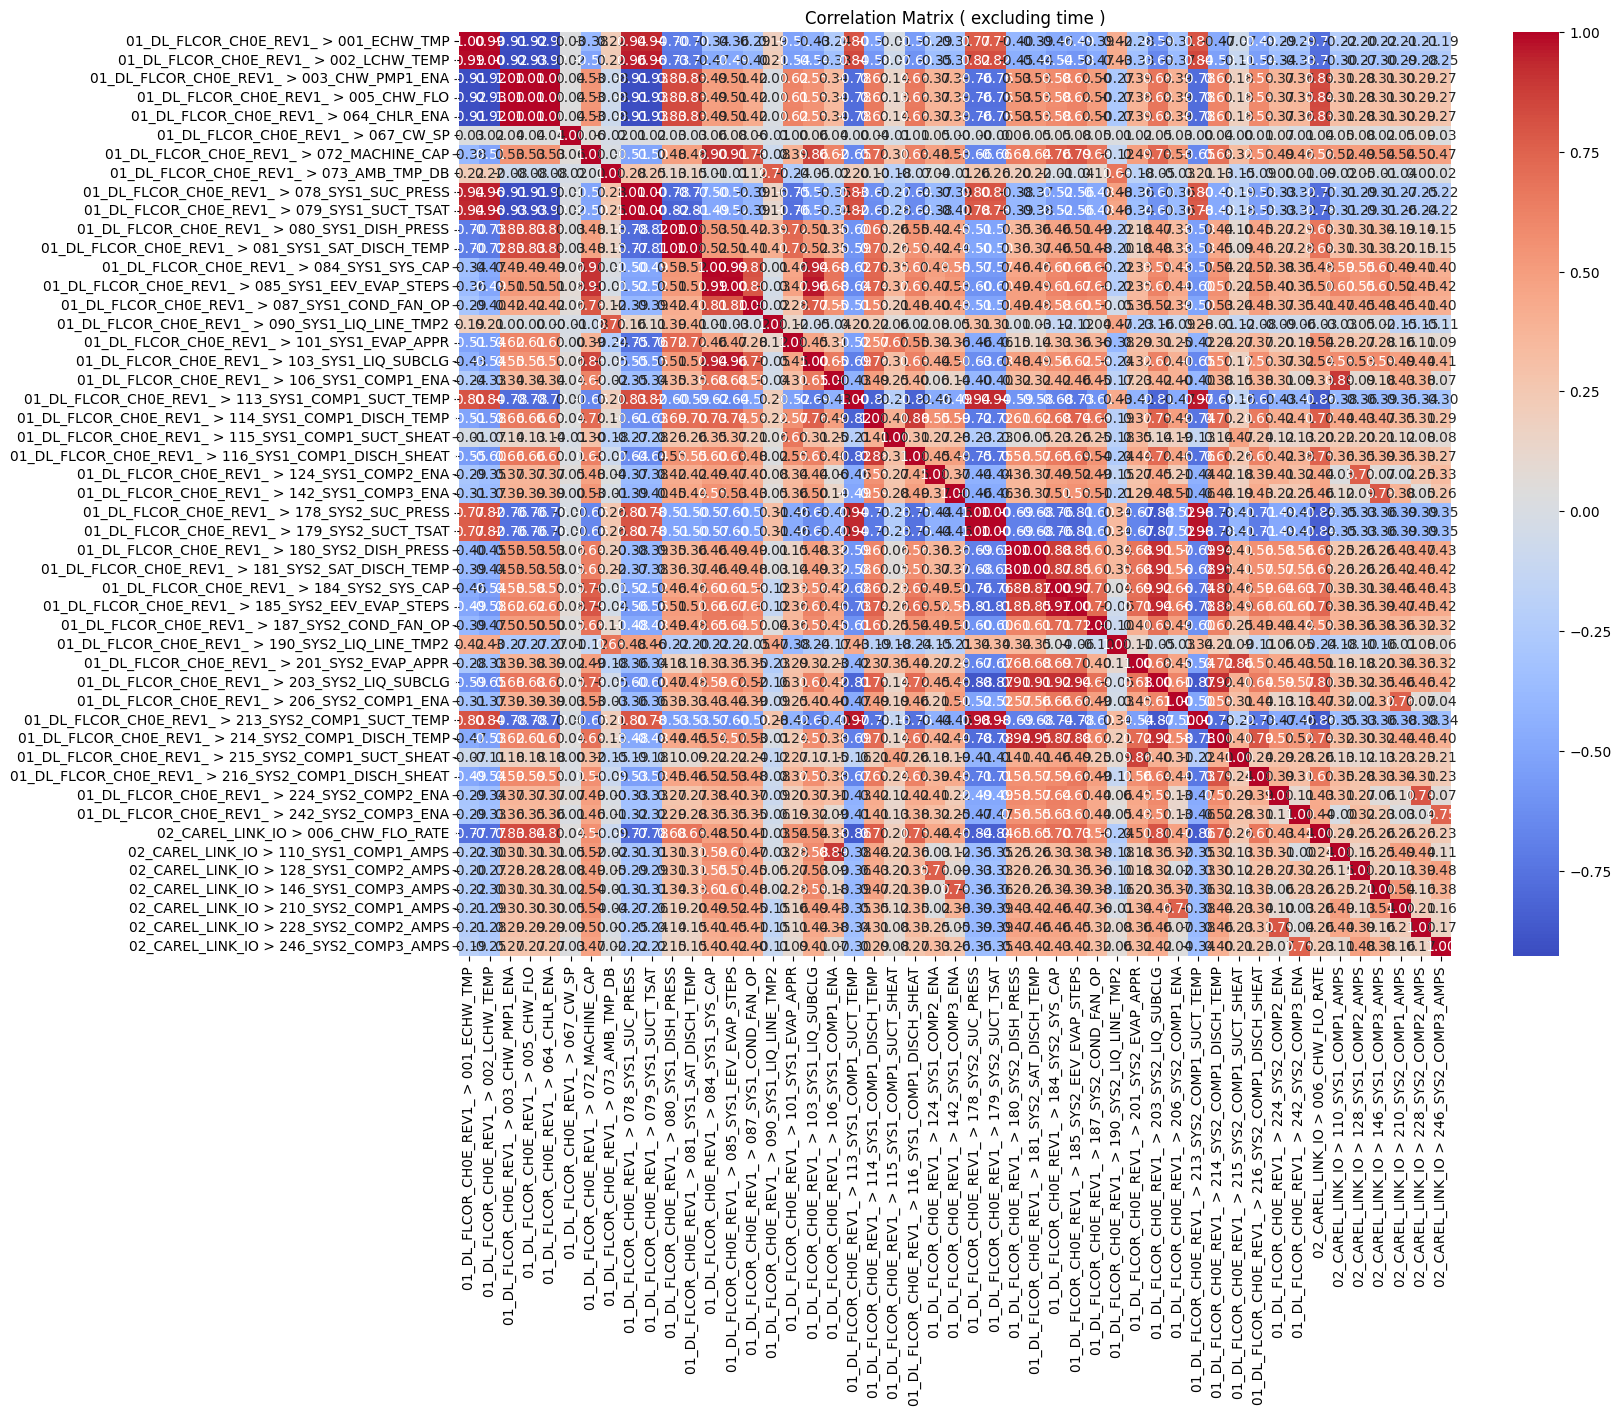

In [40]:
data_without_time = data_without_time.dropna()
corr_matrix = data_without_time.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ( excluding time )')
plt.show()


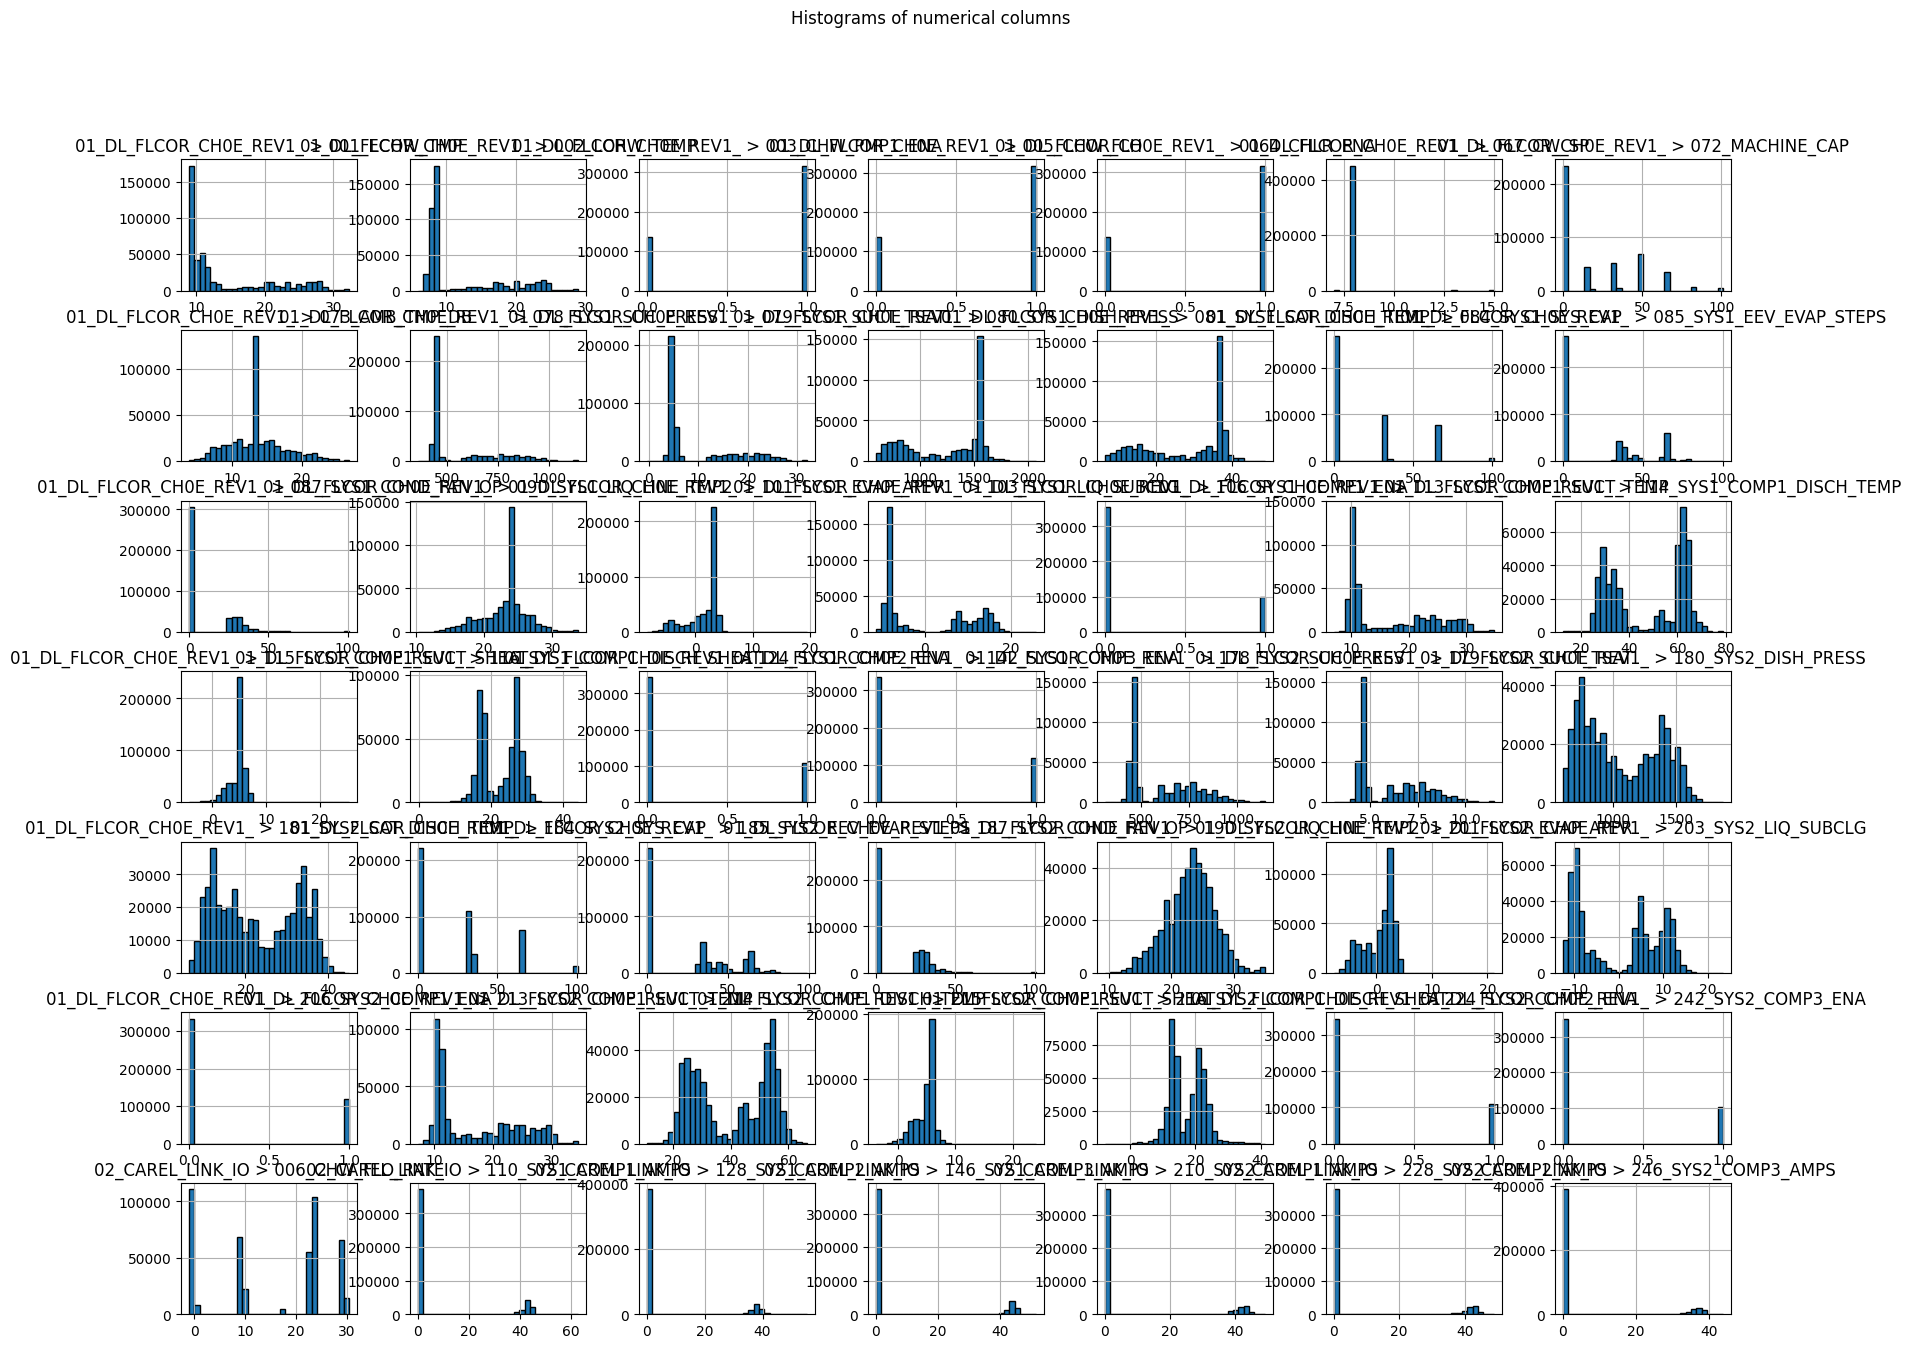

In [41]:
data_without_time.hist(figsize=(20, 15), bins =30, edgecolor='black')
plt.suptitle('Histograms of numerical columns')
plt.show()

In [42]:
def plot_scatter(df, x_column, y_column):
    """
    Plots a scatter plot for the specified columns in the DataFrame and saves the plot as an image.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x_column (str): The name of the column to be used for the x-axis.
    y_column (str): The name of the column to be used for the y-axis.
    """
    # Ensure columns are numeric
    df[x_column] = pd.to_numeric(df[x_column], errors='coerce')
    df[y_column] = pd.to_numeric(df[y_column], errors='coerce')

    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.7)
    plt.title(f'Scatter Plot of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)

    # Save the plot as an image file
    filename = f"Scatter Plot of {y_column} vs {x_column}.png"
    plt.savefig(filename)

    plt.show()

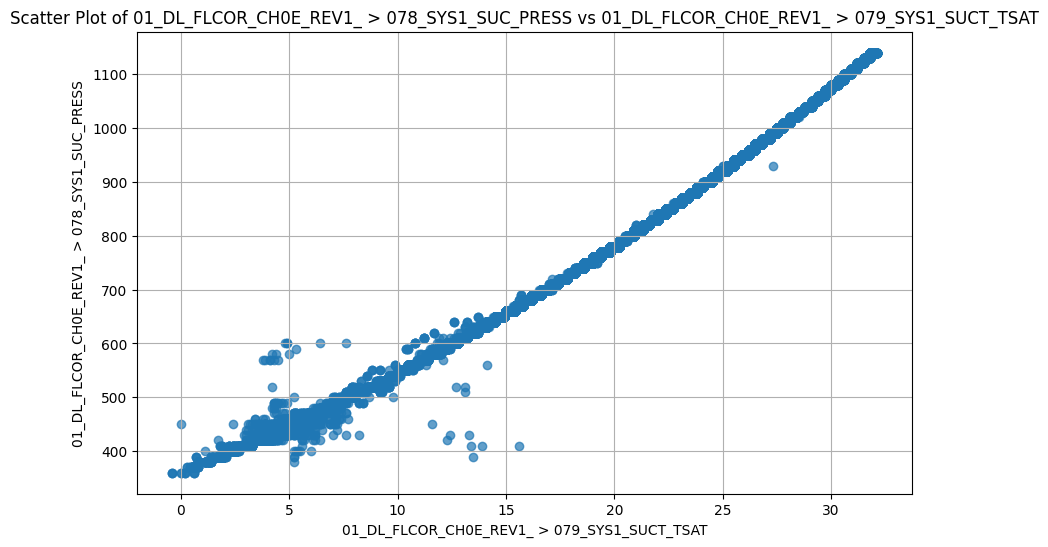

In [50]:
x = '01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT'
y = '01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS'

plot_scatter(new_data, x, y)